# Chapter 12-05
## 파이썬과 기계학습

> [Gooood blog](https://tensorflow.blog/)

> [python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition)

### 기계학습에 의한 수치 예측

In [1]:
# 데이터 작성
# 예측에 이용하는 데이터 만들기
import numpy as np

In [2]:
# 난수 seed(초깃값)를 설정
np.random.seed(9)
# 0에서 1까지 100개의 수치를 생성, 난수를 혼합하기 전의 x
x_orig = np.linspace(0, 1, 100)

In [3]:
def f(x):
    # x에 대응하는 sin값을 돌려주는 함수
    return np.sin(2 * np.pi * x)

In [4]:
# 0에서 1까지 100개가 흩어져 있는 샘플 데이터 x를 생성
x = np.random.uniform(0, 1, size=100)[:, np.newaxis]  # 100X1 column vector
# x에 대응하는 sin값에 난수를 더하여 샘플 데이터(y)를 생성
y = f(x)+np.random.normal(scale=0.3, size=100)[:, np.newaxis] # 100X1 column vector

[HELP: np.newaxis]{https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it)

In [5]:
x.shape,y.shape

((100, 1), (100, 1))

In [6]:
x[:5],y[:5]

(array([[0.01037415],
        [0.50187459],
        [0.49577329],
        [0.13382953],
        [0.14211109]]), array([[-0.07460893],
        [-0.09500992],
        [ 0.03720392],
        [ 0.9996937 ],
        [ 0.82779979]]))

In [8]:
# 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# 학습용 데이터와 테스트용 데이터를 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (80, 1), (20, 1), (80, 1))

(0, 1)

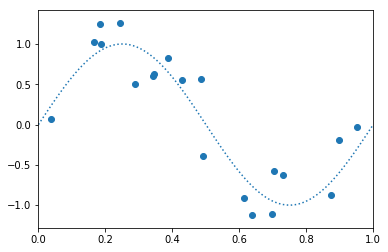

In [10]:
# 원래 sin값과 샘플 데이터를 plot
plt.plot(x_orig, f(x_orig), ls=':')
plt.scatter(x_train, y_train)
plt.xlim((0, 1))

In [11]:
# 모델의 그래프 표시
# 최소 자승법의 다항식 근사를 사용하여 데이터를 학습
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### LinearRegression

> [LinearRegression](https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/)

### PolynomialFeatures

> [PolynomialFeatures](https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/)

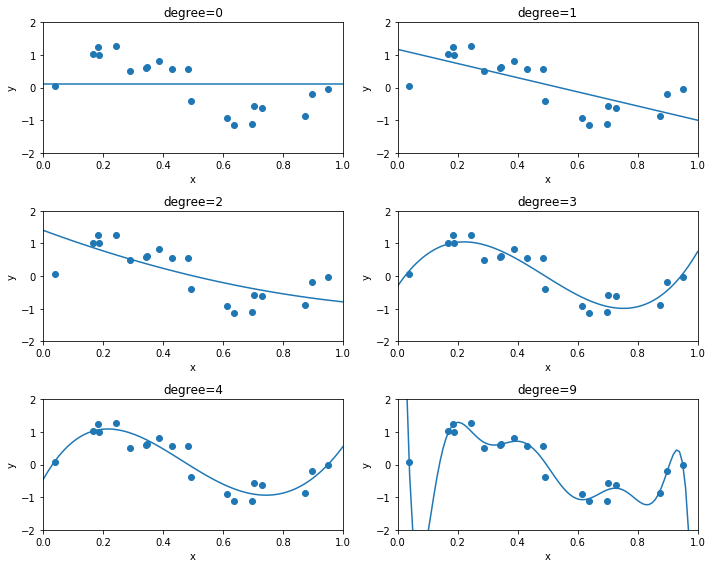

In [12]:
# 2x2의 그래프를 그리는 준비
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# 차수 0, 1, 3, 9에 대하여 학습한 결과를 표시
for ax, deg in zip(axs.ravel(), [0, 1, 2, 3, 4, 9]):
    # 파이프라인을 만듦
    e = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    # 학습 set으로 학습
    e.fit(x_train, y_train)
    # 원래의 x로 예측
    px = e.predict(x_orig[:, np.newaxis])
    # 예측결과 그래프와 테스트 데이터 점을 그림
    ax.scatter(x_train, y_train)
    ax.plot(x_orig, px)
    ax.set(xlim=(0, 1), ylim=(-2, 2),
           ylabel='y', xlabel='x',
           title='degree={}'.format(deg))

plt.tight_layout()

In [13]:
# 예측치와의 오차를 그래프화 한다
# 테스트 데이터를 사용하여 오버피팅의 모습을 그래프로 표시한다
from sklearn.metrics import mean_squared_error

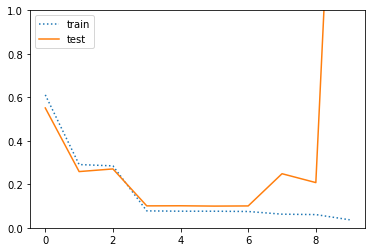

In [14]:
# 실 데이터와의 오차를 보존하는 array
train_error = np.empty(10)
test_error = np.empty(10)
# 차수 0에서 9에 대하여 조사
for deg in range(10):
    # 모델을 작성
    e = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    e.fit(x_train, y_train)
    # 테스트 데이터를 사용하여 예측값과 실제값의 오차를 조사
    train_error[deg] = mean_squared_error(y_train, e.predict(x_train))
    test_error[deg] = mean_squared_error(y_test, e.predict(x_test))

# 그래프를 그림
plt.plot(np.arange(10), train_error, ls=':', label='train')
plt.plot(np.arange(10), test_error, ls='-', label='test')
plt.ylim((0, 1))
plt.legend(loc='upper left')

### 도전하기

> 각 차수에서의 트레인데이터 오차와 데스트데이터 오차 사이의 차를 그래프로 그리시오.

(-1, 1)

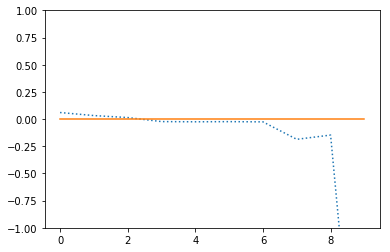

In [30]:
# challenge
plt.plot(np.arange(10), train_error - test_error, ls=':', label='train_error - test_error')
plt.plot(np.arange(10), np.zeros(10), ls='-') 
plt.ylim((-1, 1))

> 다항함수 차수가 2 ~ 6 에서 오차가 작게됨을 확인한다.

> 차수 7,8 에서는 과대접합(Overfitting)이 발생함.

In [16]:
# check
np.arange(10),np.zeros(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

***

## 머신러닝 (Machine learning)

> [tensorflow.blog/파이썬-머신러닝/1-소개](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/1-%EC%86%8C%EA%B0%9C/#1.1.1)

> [wikipedia](https://ko.wikipedia.org/wiki/%EA%B8%B0%EA%B3%84_%ED%95%99%EC%8A%B5)

* 지도 학습 (Supervised learning) : 데이터에 레이블이 지정됨. 

    * 지도학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.
    * 준비된 입력/출력 샘플 데이터, 즉 훈련 데이터로부터 머신러닝 모델을 만든다.
    * 목표는 이전에 본적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이다.

> 지도 학습에는 분류(classification)와 회귀(regression)가 있다.
    - 분류: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것.   
    - 회귀: 연속적인 숫자(실수)를 예측하는 것. 출력 값에 연속성이 있다.
    
> 지도 학습의 예
    - 편지 봉투에 손으로 쓴 우편번호 숫자 판별
    - 의료 영상 이미지에 기반한 종양 판단
    - 의심되는 신용카드 거래 감지
    
* 비지도학습 (Unsupervised learning) : 데이터에 레이블이 없음.

    * 입력은 주어지지만 출력은 제공되지 않습니다.
    * 주어진 입력 데이터에서 숨어 있는 구조와 질서를 찾는 방법
    
> 비지도 학습의 예
    - 블로그 글의 주제 구분
    - 고객들을 취향이 비슷한 그룹으로 묶기
    - 비정상적인 웹사이트 접근 탐지
    
* 강화학습 (Reinforcement learning) : 보상을 이용해서 스스로 학습을 유도.

    * 어떤 환경 안에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법.
    * 기본적으로 강화 학습의 문제는 마르코프 결정 과정(MDP)으로 표현된다.
    
> 강화 학습의 예
    - AlphaGo (LEE, MASTER, ZERO)
    - 게임

***

[Goooood Intro (Python Machine Learning 2nd ed.)](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch01/ch01.ipynb)

### 머신러닝 사례

> [파이썬-머신러닝/1-7-첫-번째-애플리케이션-붓꽃의-품종-분류/](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/1-7-%EC%B2%AB-%EB%B2%88%EC%A7%B8-%EC%95%A0%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98-%EB%B6%93%EA%BD%83%EC%9D%98-%ED%92%88%EC%A2%85-%EB%B6%84%EB%A5%98/)

### 1. 붓꽃 (iris) 의 품종 분류
* 간단한 머신러닝 애플리케이션을 훑어가면서 첫 번째 모델을 만들어보겠습니다. 
* 그러면서 핵심 개념과 용어를 소개하겠습니다.


* 한 아마추어 식물학자가 들에서 발견한 붓꽃의 품종을 알고 싶다고 가정
* 이 식물학자는 붓꽃의 꽃잎<sup>petal</sup>과 꽃받침<sup>sepal</sup>의 폭과 길이를 센티미터 단위로 측정(그림 1-2).
* 이 측정값을 이용해서 앞에서 채집한 붓꽃이 어떤 품종인지 구분하려고 함.
  - 이 아마추어 식물학자가 야생에서 채집한 붓꽃은 이 세 종류뿐이라고 가정


* 우리의 목표는 어떤 품종인지 구분해놓은 측정 데이터를 이용해 새로 채집한 붓꽃의 품종을 예측하는 머신러닝 모델을 만드는 것입니다.


![](https://tensorflowkorea.files.wordpress.com/2017/06/1-2.png?w=400&h=400)


그림 1-2 붓꽃의 부위

* 붓꽃의 품종을 정확하게 분류한 레이블 데이터를 가지고 있으므로 이 문제는 지도 학습
* 이 경우에는 몇 가지 선택사항(붓꽃의 품종) 중 하나를 선택하는 문제
* 그러므로 이 예는 분류<sup>Classification</sup> 문제에 해당합니다. 출력될 수 있는 값(붓꽃의 종류)들을 클래스<sup>class</sup>라고 합니다
* 데이터셋에 있는 붓꽃 데이터는 모두 세 클래스 중 하나에 속합니다. 따라서 이 예는 세 개의 클래스를 분류하는 문제입니다.
* 데이터 포인트 하나(붓꽃 하나)에 대한 기대 출력은 꽃의 품종이 됩니다. 이런 특정 데이터 포인트에 대한 출력, 즉 품종을 레이블<sup>label</sup>이라고 합니다.

### 1.1 데이터 준비
데이터셋은 머신러닝과 통계 분야에서 오래전부터 사용해온 붓꽃<sup>iris</sup> 데이터셋
* 이 데이터는 scikit-learn의 datasets 모듈에 포함
* load_iris 함수를 사용해서 데이터를 적재


In [17]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

iris_dataset은 파이썬의 딕셔너리<sup>Dictionary</sup>와 유사한 Bunch 클래스의 객체입니다. 즉 키와 값으로 구성되어 있습니다.

>  단어 그대로 해석하면 사전이라는 뜻이다. 즉, people이라는 단어에 "사람", baseball이라는 단어에 "야구"라는 뜻이 부합되듯이 딕셔너리는 Key와 Value라는 것을 한 쌍으로 갖는 자료형이다. 예컨대 Key가 "baseball"이라면 Value는 "야구"가 될 것이다.

In [18]:
print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


DESCR 키에는 데이터셋에 대한 간략한 설명이 들어 있습니다. 앞부분만 조금 살펴보겠습니다.

In [19]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


target_names의 값은 우리가 예측하려는 붓꽃 품종의 이름을 문자열 배열로 가지고 있습니다.

In [20]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


feature_names의 값은 각 특성(feature)을 설명하는 문자열 리스트입니다.

In [22]:
print("특성의 이름: \n{}".format(iris_dataset['feature_names']))

특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


> 실제 데이터는 target과 data 필드에 들어 있습니다. data는 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치 값으로 가지고 있는 NumPy 배열입니다.

In [23]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


data 배열의 행은 개개의 꽃이 되며 열은 각 꽃에서 구한 네 개의 측정치입니다.

In [24]:
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


* 이 배열은 150개의 붓꽃 데이터를 가지고 있습니다. 
* 머신러닝에서 각 아이템은 **샘플**이라 하고 속성은 **특성**이라고 부릅니다. 
* data 배열의 크기는 샘플의 수에 특성의 수를 곱한 값이 됩니다

다음은 맨 처음 다섯 샘플의 특성값입니다.

In [25]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))
# 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [26]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [24]:
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [28]:
# 처음 다섯 data의 class
iris_dataset['target'][:5]

array([0, 0, 0, 0, 0])

붓꽃의 종류는 0에서 2까지의 정수로 기록되어 있습니다.

In [29]:
print("타깃:\n{}".format(iris_dataset['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
np.unique(iris_dataset['target'])

array([0, 1, 2])

> 숫자의 의미는 iris[‘target_names’] 배열에서 확인할 수 있습니다. 0은 setosa, 1은 versicolor, 2는 virginica입니다.

In [31]:
 iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 1.2 훈련 데이터와 테스트 데이터

* 이 데이터로 머신러닝 모델을 만들고 새로운 데이터의 품종을 예측
* 하지만 만든 모델을 새 데이터에 적용하기 전에 이 모델이 진짜 잘 작동하는지 알아야 합니다. 즉 우리가 만든 모델의 예측을 신뢰할 수 있는지 알아야 합니다.


* 불행히도 모델을 만들 때 쓴 데이터는 평가 목적으로 사용할 수 없습니다. 
* 모델이 훈련 데이터를 그냥 전부 기억할 수 있으니 훈련 데이터에 속한 어떤 데이터라도 정확히 맞출 수 있기 때문이다.
* 이렇게 데이터를 기억한다는 것은 모델을 잘 일반화하지 않았다는 뜻입니다(다른 말로는 새로운 데이터에 대해서는 잘 작동하지 않는다는 것입니다).


* 모델의 성능을 측정하려면 레이블을 알고 있는 (이전에 본 적 없는) 새 데이터를 모델에 적용해봐야 합니다.
* 이를 위해 우리가 가지고 있는 레이블된 데이터(150개의 붓꽃 데이터)를 두 그룹으로 나눕니다.
* <b>그중 하나는 머신러닝 모델을 만들 때 사용하며, 훈련 데이터 혹은 훈련 세트<sup>training set</sup>라고 합니다. 나머지는 모델이 얼마나 잘 작동하는지 측정하는 데 사용하며, 이를 테스트 데이터, 테스트 세트<sup>test set</sup> 혹은 홀드아웃 세트<sup>hold-out set</sup>라고 부릅니다.</b>


* **scikit-learn은 데이터셋을 섞어서 나눠주는 train_test_split 함수를 제공**
* 이 함수는 전체 행 중 75% 를 레이블 데이터와 함께 훈련 세트로 뽑습니다. 나머지 25%는 레이블 데이터와 함께 테스트 세트가 됩니다


* **scikit-learn에서 데이터는 대문자 X로 표시하고 레이블은 소문자 y로 표기합니다**
* 이는 수학에서 함수의 입력을 x, 출력을 y로 나타내는 표준 공식 f(x)=y에서 유래된 것입니다
* 수학의 표기 방식을 따르되 데이터는 2차원 배열(행렬)이므로 대문자 X를, 타깃은 1차원 배열(벡터)이므로 소문자 y를 사용합니다.

train_test_split의 반환값을 저장하는 데 이 명명 규칙을 사용하겠습니다.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

* train_test_split 함수로 데이터를 나누기 전에 유사 난수 생성기를 사용해 데이터셋을 무작위로 섞어야 합니다.
* 만약 섞지 않은 상태로 데이터셋 뒤쪽의 25%를 테스트 세트로 이용한다면 그 데이터의 레이블은 모두 2가 됩니다.
* 세 클래스 중 하나만 포함한 테스트 세트를 사용하면 모델이 얼마나 잘 일반화되었는지 알 수 없습니다.


* 이 함수를 여러 번 실행해도 결과가 똑같이 나오도록 유사 난수 생성기에 넣을 난수 초깃값을 random_state 매개변수로 전달합니다
* 이렇게 하면 이 코드는 항상 같은 결과를 출력(이 책에서 난수를 사용할 때는 항상 이렇게 random_state를 고정)


* train_test_split 함수의 반환값은 X_train, X_test, y_train, y_test이며 모두 NumPy 배열입니다. X_train은 전체 데이터셋의 75%를, X_test는 나머지 25%를 담고 있습니다.

In [33]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))
150*.75

X_train 크기: (112, 4)
y_train 크기: (112,)


112.5

In [34]:
y_train[:10]

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2])

In [35]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


### 1.3 가장 먼저 할 일: 데이터 구조 살펴보기
* 머신러닝 모델을 만들기 전에 머신러닝이 없이도 풀 수 있는 문제는 아닌지, 혹은 필요한 정보가 누락되지는 않았는지 데이터를 조사해보는 것
* 또한 데이터를 탐색하면서 비정상적인 값이나 특이한 값들을 찾을 수도 있습니다
> 예를 들어 붓꽃 데이터 중 일부는 센티미터가 아니고 인치로 되어 있을 수도 있습니다. 실제로 데이터에 일관성이 없거나 이상한 값이 들어가 있는 경우가 종종 있습니다.

* 시각화는 데이터를 조사하는 아주 좋은 방법입니다. 산점도<sup>scatter plot</sup>가 그중 하나입니다.
> 산점도는 데이터에서 한 특성을 x 축에 놓고 다른 하나는 y 축에 놓아 각 데이터 포인트를 하나의 점으로 나타내는 그래프

* 컴퓨터 화면은 2차원이라 한 번에 2개(혹은 3개 2 )의 특성만 그릴 수 있다.
* 3개 이상의 특성을 표현하기 위해 모든 특성을 짝지어 만드는 산점도 행렬<sup>scatter matrix</sup>을 사용


In [36]:
from IPython.display import display  

import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
# import mglearn

In [37]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

iris_dataframe[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205DE596208>,
      dtype=object)

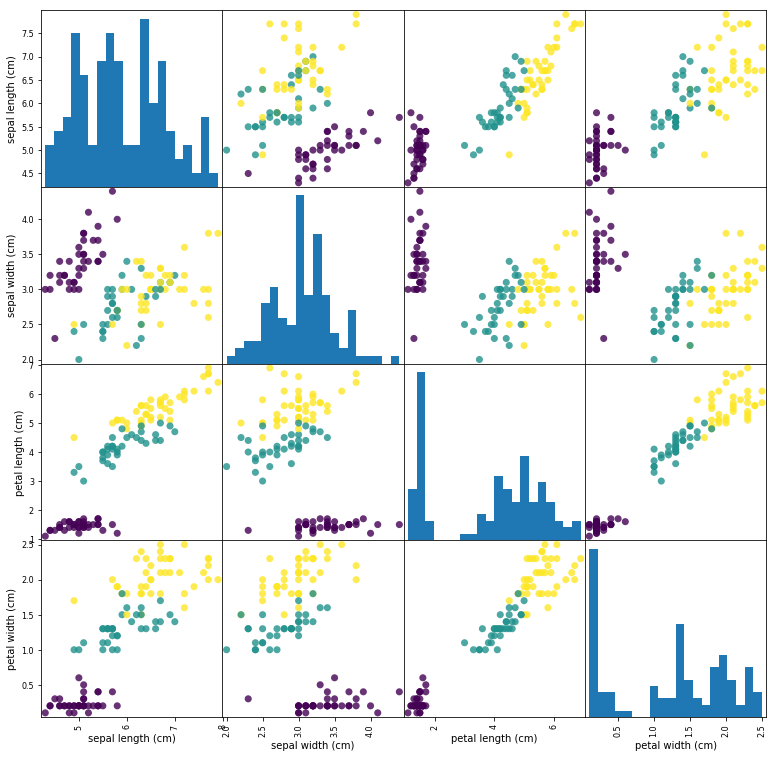

In [38]:
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(13, 13), marker='o',
hist_kwds={'bins': 20}, s=50, alpha=.8) 

그림 1-3 클래스 레이블을 색으로 구분한 iris 데이터셋의 산점도(scatter plot) 행렬

In [40]:
# y_train 값(0,1,2)으로 품종을 색으로 구분
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

***

### 머신 러닝 

* 적용 단계
    1. 머신 러닝 방법 선택 (선택 사항 점검)
    2. 트레인 데이터를 이용해서 fit()로 모델 만들기
    3. 모델.predict()를 테스트 데이터에 적용하여 예측
    4. score()를 이용 또는 예측 오차를 계산하여 모델 평가 및 개선

### 1.4 첫 번째 머신러닝 모델: k-최근접 이웃 알고리즘
이제 실제 머신러닝 모델을 만들어보겠습니다
* 비교적 이해하기 쉬운 k-최근접 이웃<sup>k-Nearest Neighbors, k-NN</sup> 분류기를 사용
  1. 이 모델은 단순히 훈련 데이터를 저장하여 만들어집니다
  2. 새로운 데이터 포인트에 대한 예측이 필요하면 알고리즘은 새 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 찾습니다.
  3. 그런 다음 찾은 훈련 데이터의 레이블을 새 데이터 포인트의 레이블로 지정합니다.


* **k-최근접 이웃 알고리즘에서 k는 가장 가까운 이웃 ‘하나’가 아니라 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 ‘k개’의 이웃을 찾는다는 뜻**
* 그런 다음 이 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용



* k-최근접 이웃 분류 알고리즘은 neighbors 모듈 아래 KNeighborsClassifier 클래스에 구현되어 있습니다.
* 모델을 사용하려면 클래스로부터 객체를 만들어야 합니다. 이때 모델에 필요한 매개변수를 넣습니다. 
* KNeighborsClassifier에서 가장 중요한 매개변수는 이웃의 개수입니다. 우리는 1로 지정하겠습니다.

In [41]:
# k-Nearest Neighbors, k-NN 분류기
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

* knn 객체는 훈련 데이터로 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화한 것입니다. 
* 또한 알고리즘이 훈련 데이터로부터 추출한 정보를 담고 있습니다. KNeighborsClassifier의 경우는 훈련 데이터 자체를 저장하고 있습니다.


* 훈련 데이터셋으로부터 모델을 만들려면 knn 객체의 fit 메서드를 사용합니다. 
* 이 메서드는 훈련 데이터인 NumPy 배열 X_train과 훈련 데이터의 레이블을 담고 있는 NumPy 배열 y_train을 매개변수로 받습니다.

In [42]:
# Make model by fitting
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

* fit 메서드는 knn 모델 객체 자체를 반환합니다
* 여기에는 모델을 생성할 때 사용한 매개변수를 볼 수 있습니다. 
* 거의 모든 매개변수가 기본값이고 n_neighbors=1은 우리가 지정한 값이다.

### 1.5 예측하기
이제 이 모델을 사용해서 정확한 레이블을 모르는 새 데이터에 대해 예측을 만들 수 있습니다.

* 야생에서 꽃받침의 길이가 5cm, 폭이 2.9cm이고 꽃잎의 길이가 1cm, 폭이 0.2cm인 붓꽃을 보았다고 가정
* 그럼 이 붓꽃의 품종은 무엇일까요? 

먼저 이 측정값을 NumPy 배열, 즉 샘플의 수(1)에 특성의 수(4)를 곱한 크기의 NumPy 배열로 만들어보겠습니다.

In [43]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


> 붓꽃 하나의 측정값은 2차원 NumPy 배열에 행으로 들어갑니다

In [44]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


* 우리가 만든 모델이 새로운 붓꽃을 setosa 품종을 의미하는 클래스 0으로 예측했습니다.
* 그런데 어떻게 이 모델의 결과를 신뢰할 수 있을까요?

### 1.6 모델 평가하기
* 앞서 만든 테스트 세트를 사용할 때가 왔습니다. 
* 이 데이터는 모델을 만들 때 사용하지 않았고 테스트 세트에 있는 각 붓꽃의 품종을 정확히 알고 있습니다.
* 따라서 테스트 데이터에 있는 붓꽃의 품종을 예측하고 실제 레이블(품종)과 비교할 수 있습니다. 
* 얼마나 많은 붓꽃 품종이 정확히 맞았는지 정확도를 계산하여 모델의 성능을 평가합니다.

In [45]:
X_test.shape

(38, 4)

In [46]:
X_test[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

In [47]:
# 테스트 세트에 대한 예측
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [48]:
# 정확도
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [49]:
# 또 knn 객체의 score 메서드로도 테스트 세트의 정확도를 계산할 수 있습니다.
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


* 이 모델의 테스트 세트에 대한 정확도는 약 0.97입니다. 
* 이 말은 테스트 세트에 포함된 붓꽃 중 97%의 품종을 정확히 맞혔다는 뜻입니다.
* 이 결과 이 모델은 새로운 붓꽃에 대한 정확도가 97%일 것이라 기대할 수 있습니다. 
* 정확도가 높으므로 아마추어 식물학자는 이 애플리케이션을 충분히 신뢰하고 사용할만합니다. 

***

### 2. Price of RAM (Linear regression)

> [ram_price.csv](https://github.com/Redwoods/Py/blob/master/py-basic/tips/ram_price.csv)

아래는 로그 스케일로 그린 연도별 RAM 가격이다.

선형 회기를 이용해서 RAM 가격 예측 모델을 만들어보자.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Price ($/Mbyte)')

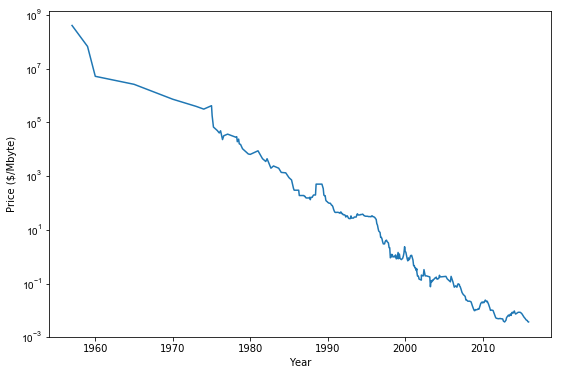

In [53]:
ram_prices = pd.read_csv("ram_price.csv")

plt.figure(figsize=(9,6))
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

In [54]:
ram_prices.head(),ram_prices.tail()

(   Unnamed: 0    date        price
 0           0  1957.0  411041792.0
 1           1  1959.0   67947725.0
 2           2  1960.0    5242880.0
 3           3  1965.0    2642412.0
 4           4  1970.0     734003.0,      Unnamed: 0     date   price
 328         328  2015.58  0.0045
 329         329  2015.67  0.0043
 330         330  2015.75  0.0042
 331         331  2015.83  0.0038
 332         332  2015.92  0.0037)

* y축(가격)은 로그 스케일로 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 예측이 쉬워진다.
* 2000년 전까지의 데이터로 2000년 후의 데이터를 예측해보자. 
* 선형회귀(LinearRegression)를 수행한다. 
* 모델을 훈련시키고 예측을 수행한 후 로그 스케일로 되돌리기 위해 지수 함수를 사용한다.

In [55]:
# 머심러닝 방법 선택과 훈련/테스트 데이터 구성
# LinearRegression
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [58]:
# 데이터 전처리
# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

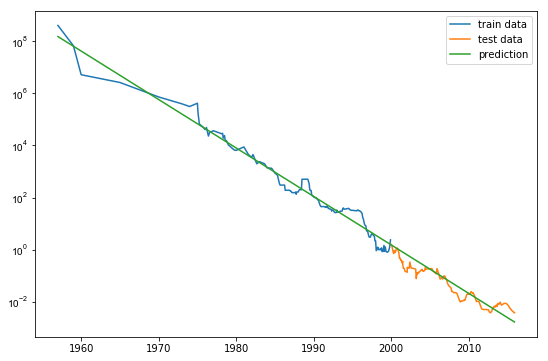

In [59]:
# 선형 회기 모델 만들기
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 원래 값으로 되돌립니다
price_lr = np.exp(pred_lr)

# 예측 그래프
plt.figure(figsize=(9,6))
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_lr, label="prediction")
plt.legend()

### 도전하기 

> RAM 가격 변동에 대한 선형 회기 모델의 정확도를 구하시오.

In [89]:
# RAM 가격 변동에 대한 선형 회기 모델의 정확도





테스트 세트의 정확도: 0.83


* 선형 모델은 직선으로 데이터를 근사하여 결과를 예측한다 
* 모델이 가진 데이터 범위 밖에서도 외삽(extreapolation)을 이용해서 예측한다. 

### 3. 수능 점수 예측 (다변수 선형회기, Multivariate Linear regression)

> [data-01-test-score.csv](https://github.com/Redwoods/Py/blob/master/py-basic/tips/data-01-test-score.csv)

수험생 25명의 수능 세 개 영역의 점수를 이용해서 수능 점수를 예측하는 다변수 선형회기 모델을 만든다.

In [63]:
# data
data = np.loadtxt('./data-01-test-score.csv', delimiter=',', dtype=np.float32)
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]], dtype=float32)

#### [1] 25명 전체 데이터를 훈련 데이터로 지정한다.

In [64]:
# LinearRegression
from sklearn.linear_model import LinearRegression

# 25명 전체 데이터를 훈련 데이터로 지정한다.
data_X = data[:, 0:-1]
data_y = data[:,[-1]]

In [65]:
data_X.shape, data_y.shape

((25, 3), (25, 1))

In [67]:
data_X,data_y  # 영역별 점수와 수능점수

(array([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]], dtype=float32), array([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
        [141.],
        [184.],
        [152.],
        [148.],
        [192.],
        [147.],
        [183

In [68]:
# 수능 점수 예측을 위한 트레인 데이터 만들기
X_train = data_X
y_train = data_y
# 선형 회기 모델 만들기
lr_model = LinearRegression().fit(X_train, y_train)

In [69]:
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lr_model.coef_,lr_model.intercept_

(array([[0.35593837, 0.54251873, 1.1674445 ]], dtype=float32),
 array([-4.336151], dtype=float32))

In [72]:
# 3개 영역 점수로 수능 점수 예측 비교
test = np.array([100, 98, 81])

In [73]:
lr_model.predict(test.reshape(1,-1))

array([[178.98752427]])

In [74]:
# 수능 점수에 대한 선형 회기 모델의 정확도
print("트레인 세트의 정확도: {:.2f}".format(lr_model.score(X_train, y_train)))

트레인 세트의 정확도: 0.99


> overfitting!!

***

## [wk11] Homework

> 25명 중 20명의 데이터를 훈련 데이터, 나머지 5명을 데스트 데이터로 지정한다.

> 모델의 정확도를 계산한다.

##### ================== 마감: 2018.11.18(일). 24:00

> [1] 데이터 구성

In [76]:
# 데이터 구성





In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

> [2] 선형 회기 모델

In [78]:
# 20명의 트레인 데이터 이용
# 선형 회기 모델 만들기





> [3] 예측과 정확도 평가

In [81]:
# 테스트 데이터에 대한 예측과 정확도 평가







## [wk11] Study

> 다음 Youtube 강의 3편를 들으면서 linear regression을 공부하시오.

> 특히, 세번째 동영상 linear regression III를 이번 과제와 연관해서 공부하시오.


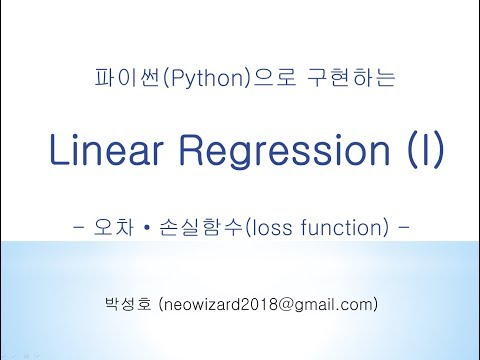

In [85]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('uk7UfDgVKrU')  # linear regression I

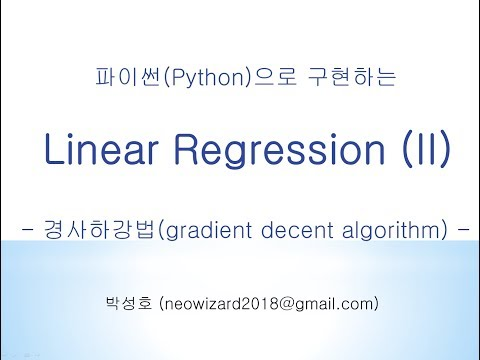

In [86]:
YouTubeVideo('q0pQ_AdphDo')  # linear regression II

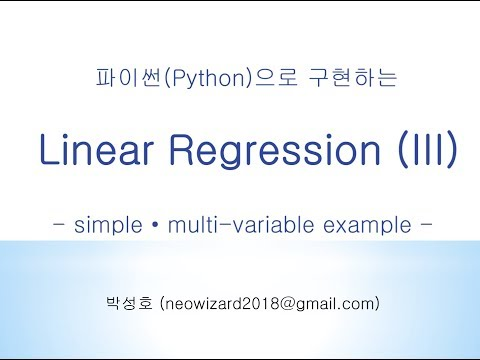

In [87]:
YouTubeVideo('Aw-E-jw3WaE')  # linear regression III

***